<h1 style='text-aling:center;color:Navy'>  Big Data Systems - Crystin VanWagenen </h1>


# <span style="color:#3665af">Big Spatial Data </span><span style="font-size:15px">(Estimated time: 40 minutes) </span>

<hr>
In this section, we will practice how to read and query spatial data using Python. 

This Lab must be completed in class and submitted by 1:35pm 


In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
#Download your data files and extract them. Then type the path where you un-zipped all the files. 
SHAPEFILES_PATH = "type here the path to your shp files. like /tmp/"

In [3]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

<div style="font-size:30px;color:#3665af;background-color:#E9E9F5;padding:10px;">1. Shapely </div>

Read [documentation](https://shapely.readthedocs.io/en/latest/) for more details.

In [4]:
import shapely as shply
from shapely import geometry

The Geometry is: Point


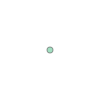

Coordinates are: [(0.0, 0.0)]


In [5]:
# Generating a point
point = shply.geometry.Point(0.0, 0.0)
print ("The Geometry is:",point.geom_type)
display(point)
print("Coordinates are:",point.coords[:])


The Geometry is: Polygon


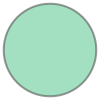

The area is: 313.6548490545939
The length (circunference) is: 62.80662313909507


(-10.0, -10.0, 10.0, 10.0)

Centroid: [(-4.3005078206506496e-16, -4.761677150267057e-16)] 
Please note that is almost 0,0


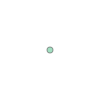

In [6]:
#Generating a point with a buffer. I.e. a full circle.
buff = shply.geometry.Point(0.0, 0.0).buffer(10.0)
print ("The Geometry is:",buff.geom_type)
display(buff)
print ("The area is:",buff.area)
print ("The length (circunference) is:",buff.length)
display(buff.bounds)
#computing the Centroid
print("Centroid:",buff.centroid.coords[:], "\nPlease note that is almost 0,0")
point = shply.geometry.Point(buff.centroid.coords)
display(point)


The Geometry is: LineString


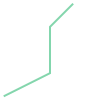

The Length is: 5.650281539872885
The Area is: 0.0


In [7]:
#Lets generate a line
line = shply.geometry.LineString([(0, 0), (2, 1),(2,3),(3,4)])
print ("The Geometry is:",line.geom_type)
display(line)
print("The Length is:",line.length)
print("The Area is:",line.area)


The Geometry is: LinearRing


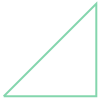

The Length is: 3.414213562373095
The Area is: 0.0


In [8]:
#Generating a ring
ring = shply.geometry.LinearRing([(0, 0), (1, 1), (1, 0)])
print ("The Geometry is:",ring.geom_type)
display(ring)
print("The Length is:",ring.length)
print("The Area is:",ring.area)


Another Ring
The Geometry is: LinearRing


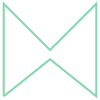

The Length is: 9.389676819719329
The Area is: 0.0

Plotting the Ring


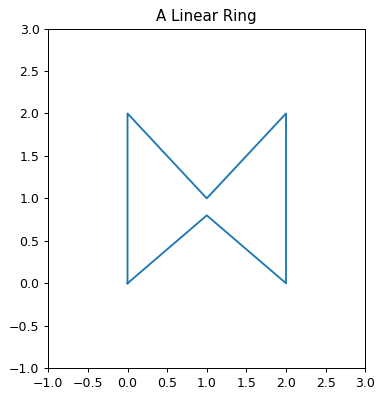

In [9]:
print("Another Ring")
ring = shply.geometry.LinearRing([(0, 0), (0, 2), (1, 1), (2, 2), (2, 0), (1, 0.8), (0, 0)])
print ("The Geometry is:",ring.geom_type)
display(ring)
print("The Length is:",ring.length)
print("The Area is:",ring.area)
print("\nPlotting the Ring")
fig = pyplot.figure(1, figsize=(10,5), dpi=90)
ax = fig.add_subplot(121)
coords=np.asarray(ring.coords)
pyplot.plot(coords[:,0],coords[:,1])
ax.set_xlim(-1,3)
ax.set_ylim(-1,3)
ax.set_title('A Linear Ring')
pyplot.show()

<div style="font-size:20px;background-color:#A74A54;color:#F1E6E7;padding:10px;">
    Question 1:
</div>

**Why is the calculated area zero?**

<div style="font-size:18px;color:#F1F8FC;background-color:#0095bA;padding:10px;"> 
More complex objects</div>

Starting with a polygon inside another polygon. 

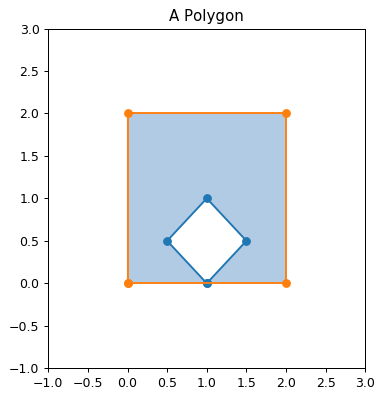

In [10]:
from descartes.patch import PolygonPatch
BLUE = '#6699cc'
GRAY = '#999999'
fig = pyplot.figure(1, figsize=(10,5), dpi=90)

# 1: valid polygon
ax = fig.add_subplot(121)
ext = [(0, 0), (0, 2), (2, 2), (2, 0), (0, 0)]
int = [(1, 0), (0.5, 0.5), (1, 1), (1.5, 0.5), (1, 0)][::-1]

polygon = shply.geometry.Polygon(ext, [int])

coords=np.asarray(polygon.interiors[0].coords)
pyplot.plot(coords[:,0],coords[:,1],marker='o')

coords=np.asarray(polygon.exterior.coords)
pyplot.plot(coords[:,0],coords[:,1],marker='o')

patch = PolygonPatch(polygon,facecolor=BLUE, edgecolor=GRAY, alpha=0.5, zorder=2)
ax.add_patch(patch)

ax.set_title('A Polygon')

ax.axis( (-1, 3, -1, 3) )

pyplot.show()


Let's create a new LineString and compute a buffer of 0.5 arround that line.

We will plot that line and buffer.

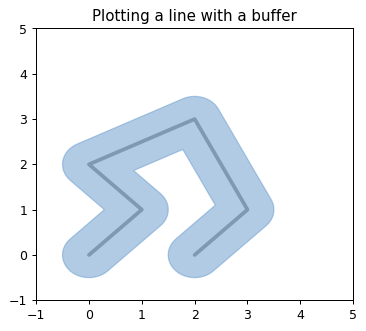

In [11]:
line = shply.geometry.LineString([(0, 0), (1, 1), (0, 2), (2,3), (3, 1), (2, 0)])

fig = pyplot.figure(1, figsize=(10, 4), dpi=90)

ax = fig.add_subplot(121)

x, y = line.xy
ax.plot(x, y, color=GRAY, linewidth=3, solid_capstyle='round', zorder=1)
    
dilated = line.buffer(0.5)
patch1 = PolygonPatch(dilated, fc=BLUE, ec=BLUE, alpha=0.5, zorder=2)
ax.add_patch(patch1)
ax.set_title("Plotting a line with a buffer")
ax.axis( (-1, 5, -1, 5) )
pyplot.show()

<div style="font-size:18px;color:#F1F8FC;background-color:#0095bA;padding:10px;"> 
Let's now play with some spatial functions</div>

Compute the difference between two shapes. In this case, two circles. 

In [12]:
a = shply.geometry.Point(1, 1).buffer(1.5)
b = shply.geometry.Point(2, 1).buffer(1.5)
diff=a.difference(b)
print("Difference of two polygons")
print ("The Geometry for A is:",a.geom_type)
print ("The Geometry for B is:",b.geom_type)
print ("The Geometry for the difference is:",diff.geom_type)


print("\nThe Area of A is:",a.area)
print("The Area of B is:",b.area)
print("The Area of the diffrence is:",diff.area)


Difference of two polygons
The Geometry for A is: Polygon
The Geometry for B is: Polygon
The Geometry for the difference is: Polygon

The Area of A is: 7.057234103728364
The Area of B is: 7.057234103728364
The Area of the diffrence is: 2.9410355135887025


Plotting...


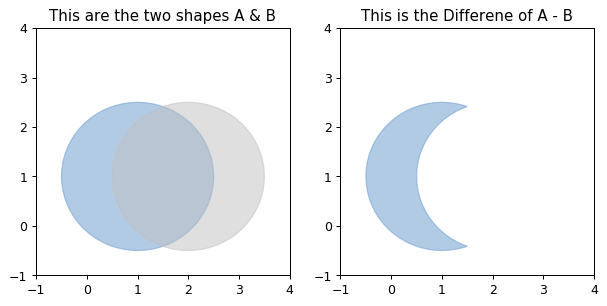

In [13]:
BLUE = '#6699cc'
GRAY = '#C0C0C0'

print("Plotting...")
fig = pyplot.figure(1, figsize=(8, 8), dpi=90)
ax = fig.add_subplot(221)
 
patch1 = PolygonPatch(a, fc=BLUE, ec=BLUE, alpha=0.5, zorder=2)
ax.add_patch(patch1)

patch2 = PolygonPatch(b, fc=GRAY, ec=GRAY, alpha=0.5, zorder=2)
ax.add_patch(patch2)

ax.set_title("This are the two shapes A & B")
ax.axis( (-1, 4, -1, 4) )

ax2 = fig.add_subplot(222)
patch1 = PolygonPatch(diff, fc=BLUE, ec=BLUE, alpha=0.5, zorder=2)
ax2.add_patch(patch1)
ax2.set_title("This is the Differene of A - B")
ax2.axis( (-1, 4, -1, 4) )
pyplot.show()

Now, let's compute the symmetric difference between the two shapes.

Plotting...


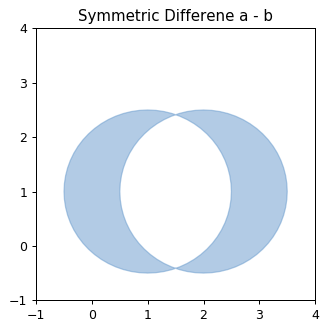

In [14]:
print("Plotting...")
diff=a.symmetric_difference(b)

fig = pyplot.figure(1, figsize=(4,4), dpi=90)

ax2 = fig.add_subplot(111)
patch1 = PolygonPatch(diff, fc=BLUE, ec=BLUE, alpha=0.5, zorder=2)
ax2.add_patch(patch1)
ax2.set_title("Symmetric Differene a - b")
ax2.axis( (-1, 4, -1, 4) )
pyplot.show()

<div style="font-size:20px;background-color:#A74A54;color:#F1E6E7;padding:10px;">
    Question 2:
</div>

**If the difference is A - B, how would you define the symmetric difference of A and B?**

<div style="font-size:20px;background-color:#0B6713;color:#F1E6E7;padding:10px;">
    TO-DO 1:
</div>

**Following the code above, get the intersection for the following shapes:**
- A circle centered at (3,2) with radius of 1.5, and 
- a polygon with this shape: \[ (2, 1), (3, 2), (2, 4), (0, 1), (2, 1)\]

You might want to quickly review the [documentation](https://shapely.readthedocs.io/en/latest/) for more details.

As a result, you should display the _type of geometry_ of the intersection and _its area_. Also, add _two plots_. The first one, having both figures, and the second one having the intersection only.
You should use the following scale for your plots: (-1, 5, -1, 5).

Place your code below.

(-1, 5, -1, 5)

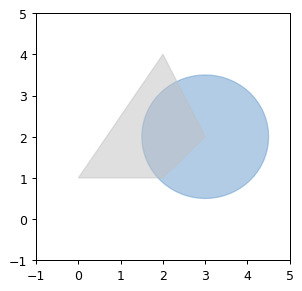

In [37]:
a = shply.geometry.Point(3, 2).buffer(1.5)
b = shply.geometry.Polygon([(2,1), (3, 2), (2, 4), (0, 1), (2, 1)])
fig = pyplot.figure(1, figsize=(8, 8), dpi=90)
ax = fig.add_subplot(221)
 
patch1 = PolygonPatch(a, fc=BLUE, ec=BLUE, alpha=1.5, zorder=2)
ax.add_patch(patch1)
patch2 = PolygonPatch(b, fc=GRAY, ec=GRAY, alpha=0.5, zorder=2)
ax.add_patch(patch2)
ax.axis((-1, 5, -1, 5))


Plotting...


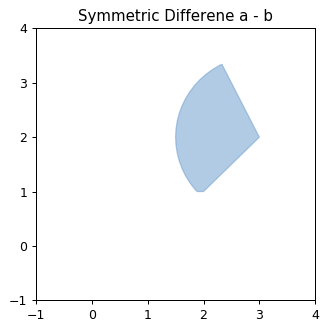

In [39]:
### PART 2
print("Plotting...")
diff = a.intersection(b)

fig = pyplot.figure(1, figsize=(4,4), dpi=90)

ax2 = fig.add_subplot(111)
patch1 = PolygonPatch(diff, fc=BLUE, ec=BLUE, alpha=0.5, zorder=2)
ax2.add_patch(patch1)
ax2.set_title("Symmetric Differene a - b")
ax2.axis( (-1, 4, -1, 4) )
pyplot.show()

<div style="font-size:30px;color:#3665af;background-color:#E9E9F5;padding:10px;">2. Geocoding </div>

- Geocoding is the process of transforming a description of a location - such as coordinates, address or the name of a place to a location on the Earth surface.

In this section we will learn how to map physical addresses with given Latitude/Longitude coordinates using the OpenStreet Map. 

In [40]:
import geopy
from geopy.geocoders import Nominatim

In [50]:
geolocator = Nominatim()
location=geolocator.geocode("1380 Lawrence St., Denver,CO 80204")
print(location.address,"\n")
print("Geo Coordinates:",(location.latitude,location.longitude),"\n")
print(location.raw)

Lawrence Street Center (CU Denver), 1380, Lawrence Street, Theatre District, Denver, Denver County, Colorado, 80204, United States of America 

Geo Coordinates: (39.7460322, -104.99918535244) 

{'place_id': '77432969', 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': '34857964', 'boundingbox': ['39.7457833', '39.7462988', '-104.9994901', '-104.9989466'], 'lat': '39.7460322', 'lon': '-104.99918535244', 'display_name': 'Lawrence Street Center (CU Denver), 1380, Lawrence Street, Theatre District, Denver, Denver County, Colorado, 80204, United States of America', 'class': 'building', 'type': 'yes', 'importance': 0.63025}


In [51]:
geolocator = Nominatim()
locatuon = geolocator.reverse("39.7460322, -104.99918535244")
print(location.address)

Lawrence Street Center (CU Denver), 1380, Lawrence Street, Theatre District, Denver, Denver County, Colorado, 80204, United States of America


<div style="font-size:20px;background-color:#0B6713;color:#F1E6E7;padding:10px;">
    TO-DO 2:
</div>

Inspect the previous outputs, and for the [Gran Central Terminal in Manhattan, NY](https://en.wikipedia.org/wiki/Grand_Central_Terminal) provide code as described below:


In [49]:
geolocator = Nominatim()
locatuon = geolocator.reverse("40.7527012, -73.9772498736336")
print(location.address)

GCT, 89, East 42nd Street, Diamond District, Manhattan Community Board 5, New York County, NYC, New York, 10017, United States of America


In [52]:
## b) Print the Geo coordinates of the Gran Central Terminal in Manhattan, NY

## a) Print the address of the Gran Central Terminal in Manhattan, NY
geolocator = Nominatim()
location=geolocator.geocode("89 East 42nd Street,New York, NY 10017")
print(location.address,"\n")
print("Geo Coordinates:",(location.latitude,location.longitude),"\n")
print(location.raw)

GCT, 89, East 42nd Street, Diamond District, Manhattan Community Board 5, New York County, NYC, New York, 10017, United States of America 

Geo Coordinates: (40.7527012, -73.9772498736336) 

{'place_id': '133302948', 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': '265947358', 'boundingbox': ['40.7519728', '40.7533137', '-73.978187', '-73.9763716'], 'lat': '40.7527012', 'lon': '-73.9772498736336', 'display_name': 'GCT, 89, East 42nd Street, Diamond District, Manhattan Community Board 5, New York County, NYC, New York, 10017, United States of America', 'class': 'railway', 'type': 'station', 'importance': 0.9354618267033, 'icon': 'https://nominatim.openstreetmap.org/images/mapicons/transport_train_station2.p.20.png'}


In [62]:
## c) Print the bounding box coordinates 

print(location.raw['boundingbox'])

['40.7519728', '40.7533137', '-73.978187', '-73.9763716']


<div style="font-size:30px;color:#3665af;background-color:#E9E9F5;padding:10px;">3. GeoPandas & GMPlot </div>

In this section we will use GeoPandas to access spatial information stored in shapefiles, and run queries on the data.

<div style="font-size:20px;color:#F1F8FC;background-color:#0095EA;padding:10px;">GeoPandas</div>

[GeoPandas Documentation](http://geopandas.org/index.html)

In [63]:
import geopandas as gpandas

In [65]:
#US States:
SHAPEFILES_PATH = "/Users/crystinrodrick/Desktop/Lab08_Data"
gdf_States   = gpandas.GeoDataFrame.from_file(SHAPEFILES_PATH + "/tl_2017_us_state/tl_2017_us_state.shp")
#US Counties:
gdf_Counties = gpandas.GeoDataFrame.from_file(SHAPEFILES_PATH + "/tl_2017_us_county/tl_2017_us_county.shp")
#Denver County Water Areas
gdf_Water    = gpandas.GeoDataFrame.from_file(SHAPEFILES_PATH + "/tl_2017_08031_areawater/tl_2017_08031_areawater.shp")
#US State Capitals
gdf_StateCap = gpandas.GeoDataFrame.from_file(SHAPEFILES_PATH + "/us_state_capitals/us_state_capitals.shp")

In [66]:
#Inspect the GeoDataFrames
display(gdf_States.info())
display(gdf_Counties.info())
display(gdf_Water.info())
display(gdf_StateCap.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 15 columns):
REGION      56 non-null object
DIVISION    56 non-null object
STATEFP     56 non-null object
STATENS     56 non-null object
GEOID       56 non-null object
STUSPS      56 non-null object
NAME        56 non-null object
LSAD        56 non-null object
MTFCC       56 non-null object
FUNCSTAT    56 non-null object
ALAND       56 non-null int64
AWATER      56 non-null int64
INTPTLAT    56 non-null object
INTPTLON    56 non-null object
geometry    56 non-null object
dtypes: int64(2), object(13)
memory usage: 6.6+ KB


None

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 18 columns):
STATEFP     3233 non-null object
COUNTYFP    3233 non-null object
COUNTYNS    3233 non-null object
GEOID       3233 non-null object
NAME        3233 non-null object
NAMELSAD    3233 non-null object
LSAD        3233 non-null object
CLASSFP     3233 non-null object
MTFCC       3233 non-null object
CSAFP       3233 non-null object
CBSAFP      3233 non-null object
METDIVFP    3233 non-null object
FUNCSTAT    3233 non-null object
ALAND       3233 non-null int64
AWATER      3233 non-null int64
INTPTLAT    3233 non-null object
INTPTLON    3233 non-null object
geometry    3233 non-null object
dtypes: int64(2), object(16)
memory usage: 454.7+ KB


None

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
ANSICODE    38 non-null object
HYDROID     38 non-null object
FULLNAME    38 non-null object
MTFCC       38 non-null object
ALAND       38 non-null int64
AWATER      38 non-null int64
INTPTLAT    38 non-null object
INTPTLON    38 non-null object
geometry    38 non-null object
dtypes: int64(2), object(7)
memory usage: 2.8+ KB


None

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
name          48 non-null object
state         48 non-null object
population    48 non-null float64
geometry      48 non-null object
dtypes: float64(1), object(3)
memory usage: 1.6+ KB


None

In [67]:
#Obtain the Denver County
gdf_Counties[gdf_Counties['NAME']=="Denver"]

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
624,08,031,00198131,08031,Denver,Denver County,06,H6,G4020,216,19740,,C,397057845,4236701,+39.7618502,-104.8811054,"(POLYGON ((-105.109926 39.62708, -105.109925 3..."


In [68]:
# GENERATE THE RATION OF WATER/LAND
gdf_States["ratio_water_land"] = gdf_States['AWATER']/gdf_States['ALAND'] 

In [69]:
#Inspect the available states on the geodataframe
np.array(gdf_States['STUSPS'])

array(['WV', 'FL', 'IL', 'MN', 'MD', 'RI', 'ID', 'NH', 'NC', 'VT', 'CT',
       'DE', 'NM', 'CA', 'NJ', 'WI', 'OR', 'NE', 'PA', 'WA', 'LA', 'GA',
       'AL', 'UT', 'OH', 'TX', 'CO', 'SC', 'OK', 'TN', 'WY', 'HI', 'ND',
       'KY', 'VI', 'MP', 'GU', 'ME', 'NY', 'NV', 'AK', 'AS', 'MI', 'AR',
       'MS', 'MO', 'MT', 'KS', 'IN', 'PR', 'SD', 'MA', 'VA', 'DC', 'IA',
       'AZ'], dtype=object)

In [70]:
# Filter Continental States Only
gdf_continental_states = gdf_States[gdf_States["STUSPS"].isin(['WV', 'FL', 'IL', 'MN', 'MD', 'RI', 'ID', 'NH', 'NC', 'VT', 'CT',
                                                               'DE', 'NM', 'CA', 'NJ', 'WI', 'OR', 'NE', 'PA', 'WA', 'LA', 'GA',
                                                               'AL', 'UT', 'OH', 'TX', 'CO', 'SC', 'OK', 'TN', 'WY', 'ND', 'KY', 
                                                               'VI', 'ME', 'NY', 'NV', 'MI', 'AR', 'MS', 'MO', 'MT', 'KS', 'IN',  
                                                               'SD', 'MA', 'VA', 'DC', 'IA', 'AZ'])]

<div style="font-size:18px;color:#F1F8FC;background-color:#0095bA;padding:10px;"> 
Let's now query and visualize our data.</div>

Let's display the continental states, and color code the states based on the ratio of water over land.

In [80]:
import pysal

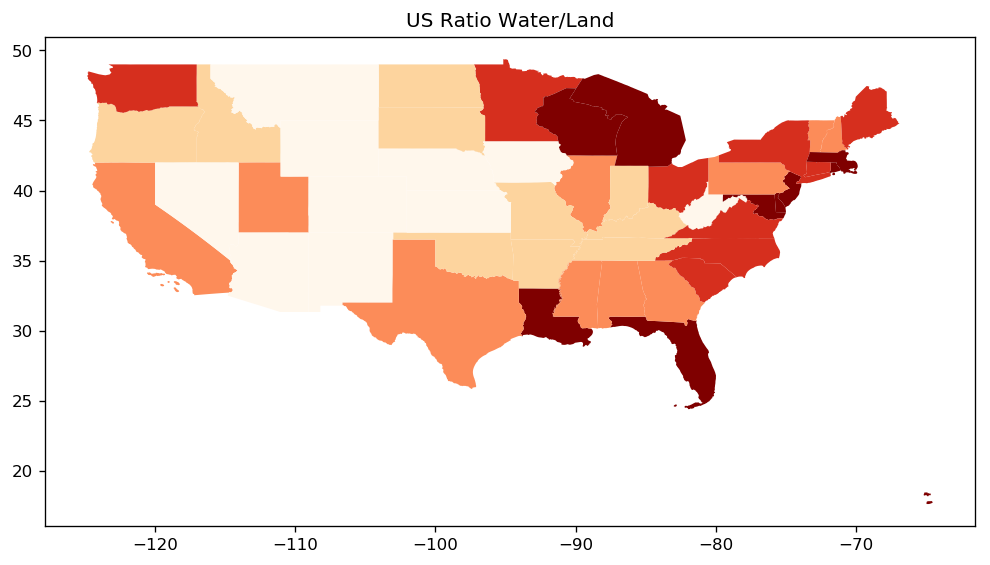

In [81]:

fig = pyplot.figure(1, figsize=(10, 10), dpi=120)

ax = fig.add_subplot(111)


ax.set_aspect('equal', anchor='C')  # keep an equal ratio between x and y. Also center the graph as posible.
ax.set_title("US Ratio Water/Land")
gdf_continental_states.plot(ax=ax, column="ratio_water_land",cmap='OrRd', scheme='quantiles')

pyplot.show();

Let's display the continental states, and color code the states based on the ratio of water over land (using a different color pantone).
Also, display the state capitals.

We will compute the centroid for each state and display it as well.

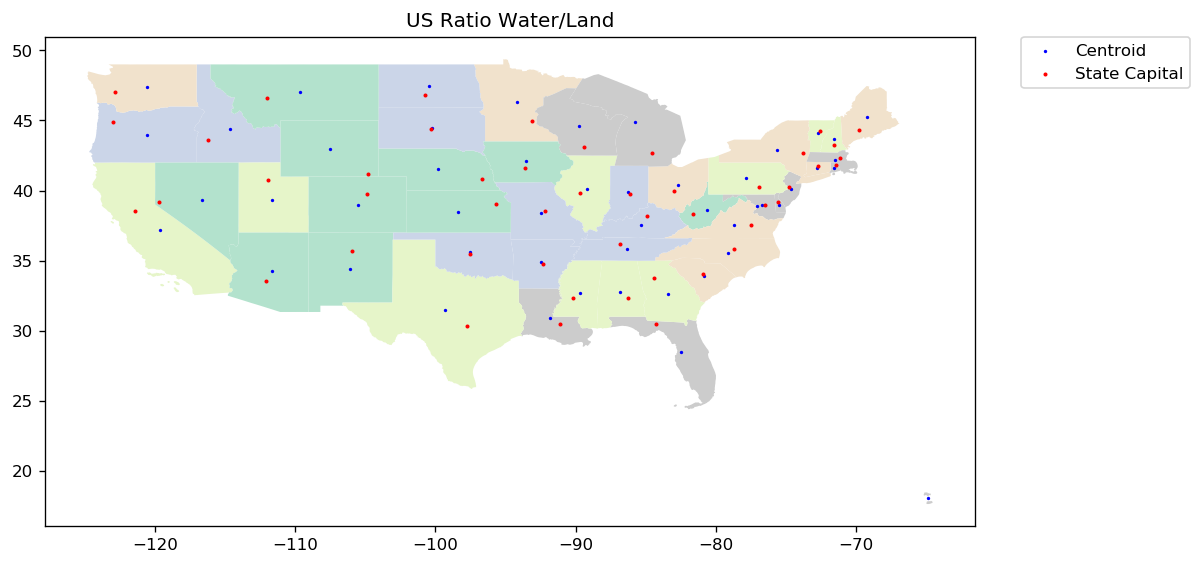

In [82]:
fig = pyplot.figure(1, figsize=(10, 10), dpi=120)

ax = fig.add_subplot(111)
ax.set_aspect('equal', anchor='C')
ax.set_title("US Ratio Water/Land")

gdf_centroids = gdf_continental_states['geometry'].centroid  #compute centroids

gdf_continental_states.plot(ax=ax, column="ratio_water_land",cmap='Pastel2',scheme='quantiles')

gdf_centroids.plot(ax=ax, color='blue',markersize=1, label="Centroid")

gdf_StateCap.plot(ax=ax, color='red',markersize=2, label="State Capital")


pyplot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 
pyplot.show();

**Now, let's compute the distance from the state capitals to the state centroid.**
We will do this for a subset of states.

In [73]:
distanceForStates=gdf_States[gdf_States["STUSPS"].isin(['CO','FL', 'IL', 'MN', 'MD', 'VT', 'CT','DE', 'NM', 'CA',])].sort_values(by="STUSPS")

for index,stateRow in distanceForStates.iterrows():
    state    = stateRow[["STUSPS"]][0]
    centroid = stateRow["geometry"].centroid

 
    stateCap = gdf_StateCap[gdf_StateCap['state']==state]['geometry']
    print("The distance between the capital and the centroid in ",state," is:",
          np.float(stateCap.distance(centroid)))

The distance between the capital and the centroid in  CA  is: 2.2526267988331665
The distance between the capital and the centroid in  CO  is: 1.0189848917687327
The distance between the capital and the centroid in  CT  is: 0.1979823205164495
The distance between the capital and the centroid in  DE  is: 0.17595133379125322
The distance between the capital and the centroid in  FL  is: 2.6858831410503456
The distance between the capital and the centroid in  IL  is: 0.602289503689698
The distance between the capital and the centroid in  MD  is: 0.18408859900320007
The distance between the capital and the centroid in  MN  is: 1.776053679284676
The distance between the capital and the centroid in  NM  is: 1.2657272982885932
The distance between the capital and the centroid in  VT  is: 0.21091931567272793


<div style="font-size:20px;background-color:#A74A54;color:#F1E6E7;padding:10px;">
    Question 3:
</div>

**Is the computed value the expected? Explain why and how you interpret the obtained values.**

**Now, let's compute the distance (in miles) from the state capitals to the state centroid.**
We will do this for a subset of states.

In [74]:
from geopy.distance import distance

for index,stateRow in distanceForStates.iterrows():
    state    = stateRow[["STUSPS"]][0]
    centroid = stateRow["geometry"].centroid

    stateCap = gdf_StateCap[gdf_StateCap['state']==state]['geometry']
    
    #Normalizing the data to be compatible set of coordinates
    stateCapital  = shply.geometry.Point(stateCap.x, stateCap.y).coords[0:]
    stateCentroid = centroid.coords[:]
    stateCapital  = [(stateCapital[0][1],stateCapital[0][0])]
    stateCentroid = [(stateCentroid[0][1],stateCentroid[0][0])]
    
    print("The distance between the capital and the centroid in ",state," is:",
          distance(stateCapital,stateCentroid).mi," miles ")

The distance between the capital and the centroid in  CA  is: 135.60071424840453  miles 
The distance between the capital and the centroid in  CO  is: 63.89203855389019  miles 
The distance between the capital and the centroid in  CT  is: 13.444207460715287  miles 
The distance between the capital and the centroid in  DE  is: 11.812730971298844  miles 
The distance between the capital and the centroid in  FL  is: 174.81215899657744  miles 
The distance between the capital and the centroid in  IL  is: 35.21554382534338  miles 
The distance between the capital and the centroid in  MD  is: 9.96940515873173  miles 
The distance between the capital and the centroid in  MN  is: 110.22831004257598  miles 
The distance between the capital and the centroid in  NM  is: 87.04473074890366  miles 
The distance between the capital and the centroid in  VT  is: 13.902231446313197  miles 


**Now, let's compute the Convex Hull for each state.**

In mathematics, the convex hull or convex envelope or convex closure of a set X of points in Euclidean plane or in Euclidean space (or, more generally, in an affine space over the reals) is the smallest convex set that contains X. For instance, when X is a bounded subset of the plane, the convex hull may be visualized as the shape enclosed by a rubber band stretched around X. Source: [Wikipedia](https://en.wikipedia.org/wiki/Convex_hull)

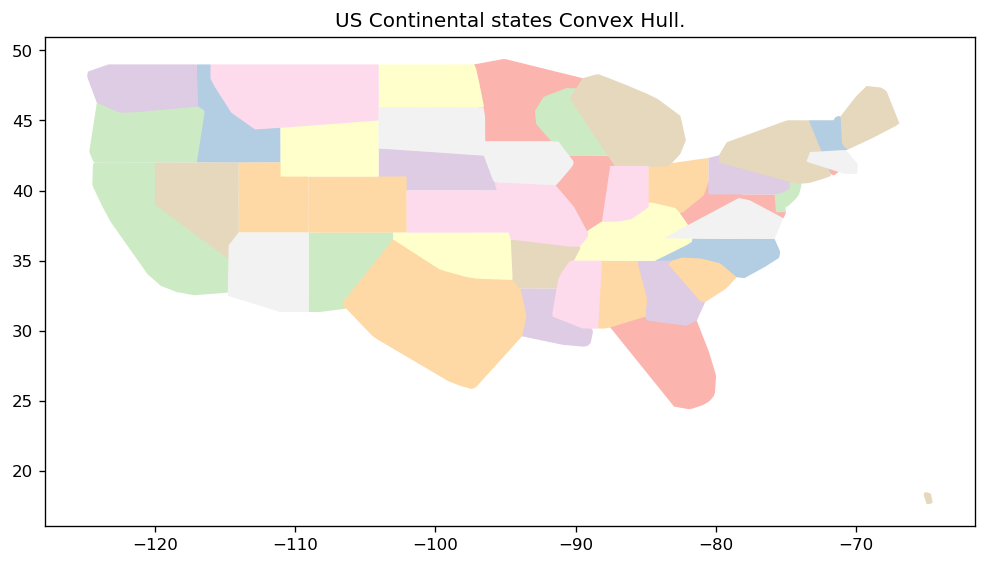

In [75]:
fig = pyplot.figure(1, figsize=(10, 10), dpi=120)

ax = fig.add_subplot(111)

ax.set_aspect('equal', anchor='C')
ax.set_title("US Continental states Convex Hull.")
gdf_continental_states['geometry'].convex_hull.plot(ax=ax,cmap='Pastel1' )
pyplot.show();

<div style="font-size:18px;color:#F1F8FC;background-color:#0095bA;padding:10px;"> 
Let's join information from different datasets to obtain more information.</div>

Let's display all the states that intersect with the water fields of the Denver County.

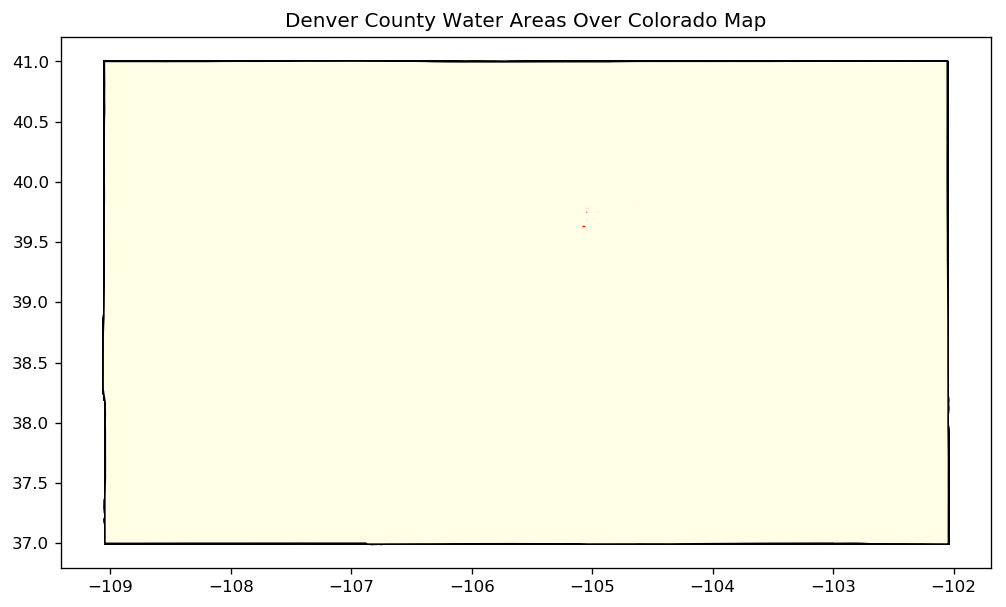

In [83]:
gdf_co    = gpandas.sjoin(gdf_States, gdf_Water, how="inner",  op='intersects')
gdf_query = gpandas.sjoin(gdf_States, gdf_Water, how="right", op='intersects')

fig = pyplot.figure(1, figsize=(10, 10), dpi=120)

ax = fig.add_subplot(111)
ax.set_aspect('equal', anchor='C')
ax.set_title("Denver County Water Areas Over Colorado Map")

gdf_co.plot(ax=ax, color='#ffffe6', edgecolor='black')
gdf_query.plot(ax=ax,color='red')

pyplot.show();

<div style="font-size:20px;background-color:#A74A54;color:#F1E6E7;padding:10px;">
    Question 4:
</div>

**Briefly explain this statement:**
<pre>gdf_query= gpandas.sjoin(gdf_States, gdf_Water, how="right", op='intersects')</pre>

<div style="font-size:20px;background-color:#0B6713;color:#F1E6E7;padding:10px;">
    TO-DO 3:
</div>
Now, display the Denver County and its water fields.

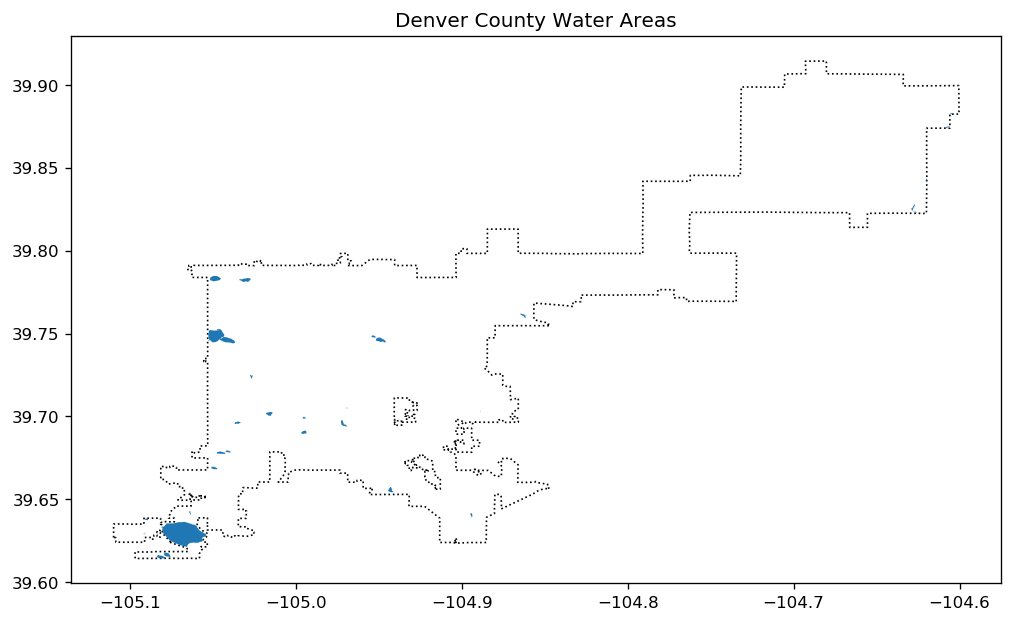

In [85]:
gdf_denver = gdf_Counties[gdf_Counties['NAME']=="Denver"]
gdf_query  = gpandas.sjoin( gdf_denver , gdf_Water , how="right", op='intersects')

fig = pyplot.figure(1, figsize=(10, 10), dpi=120)
ax = fig.add_subplot(111)

ax.set_aspect('equal', anchor='C')
ax.set_title("Denver County Water Areas")

gdf_denver.plot(ax=ax, color='white', edgecolor='black',linestyle='dotted')

gdf_query.plot(ax=ax)

pyplot.show();

<div style="font-size:20px;color:#F1F8FC;background-color:#0095EA;padding:10px;">GMPlot - Google Maps Plot</div>

GMPlot is a library that allows us to generate html files using Google Maps services to tag areas. 

In [86]:
import gmplot   #https://github.com/vgm64/gmplot

In [87]:
#Lets load the Schools geodataframe
gdf_schools = gpandas.GeoDataFrame.from_file(SHAPEFILES_PATH + "/schools/us_sc091a_aea.shp")

In [88]:
gdf_schools.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 101049 entries, 0 to 101048
Columns: 291 entries, NCESSCH to geometry
dtypes: float64(4), int64(252), object(35)
memory usage: 224.3+ MB


In [89]:
#Let's filter the schools for the Denver County.
gdf_co_schools = gdf_schools.loc[(gdf_schools["LSTATE09"]=="CO") &
                                 (gdf_schools["LCITY09"]=="DENVER")][["SCHNAM09","MZIP09","MZIP409","LSTREE09",
                                                                      "LCITY09","LSTATE09","LATCOD09","LONCOD09",
                                                                      "geometry"]]

In [91]:
gdf_co_schools.head(5)

,SCHNAM09,MZIP09,MZIP409,LSTREE09,LCITY09,LSTATE09,LATCOD09,LONCOD09,geometry
15402,EXPEDITIONARY LEARNING SCHOOL,80222,,1700 SOUTH HOLLY ST,DENVER,CO,39.68507,-104.92106,POINT (-757123.1605330723 280464.8583205082)
15562,NEW AMERICA SCHOOL,80220,,9125 EAST SEVENTH PLACE BUILDI,DENVER,CO,39.72688,-104.87794,POINT (-753037.2210495058 284786.9859786304)
15567,VANGUARD CLASSICAL SCHOOL,80230,,801 YOSEMITE ST,DENVER,CO,39.72596,-104.88628,POINT (-753752.1936690052 284750.4578007199)
15716,HOLLY HILLS ELEMENTARY SCHOOL,80222,,6161 EAST CORNELL AVE,DENVER,CO,39.66454,-104.91671,POINT (-756970.6097584058 278139.6937294304)
15730,CHALLENGE SCHOOL,80231,,9659 EAST MISSISSIPPI AVE,DENVER,CO,39.69760,-104.87660,POINT (-753229.9211015113 281509.5380016388)


Generate a file named **Denver_Schools.html** that geolocates all the schools in the county

In [92]:
gmap = gmplot.GoogleMapPlotter(39.742043, -104.991531, 12)  # This stablish the initial location in the map, by setting the lat/long and the zoom index

gmap.scatter(gdf_co_schools['LATCOD09'], gdf_co_schools['LONCOD09'], '#6699cc', size=30, marker=False)    

gmap.draw("Denver_Schools.html")

<div style="font-size:20px;background-color:#0B6713;color:#F1E6E7;padding:10px;">
    TO-DO 4 & 5:
</div>

Generate a file named **Denver_Schools_With_Name.html** that geolocates all the schools in the county, by adding named markers.

In [99]:
gmap = gmplot.GoogleMapPlotter.from_geocode("Denver,CO") # the same as before, but finding the location by name.

for index,row in gdf_co_schools.iterrows():
    landmark_title = row['SCHNAM09'].replace("'", "") #Data must be clean of special characters
    latitude  = row["LATCOD09"]
    longitude = row["LONCOD09"]
    gmap.marker(latitude,longitude, title=landmark_title)    
    
gmap.draw("Denver_Schools_With_Name.html")

Generate a file named **Denver_Schools_Heatmap.html** that displays a *Heat Map* of the schools in Denver County.

In [106]:
gmap = gmplot.GoogleMapPlotter(39.742043, -104.991531, 10)

latitudes_array  =  gdf_co_schools["LATCOD09"]
longitudes_array =  gdf_co_schools["LONCOD09"]
    
gmap.heatmap(latitudes_array, longitudes_array)

gmap.draw("Denver_Schools_Heatmap.html")



---

**SUBMIT:**
- Your jupyter-notebook (1 file)
- Your HTML files (3 html files, no zips)

*Total 4 files to submit*

&nbsp;